# Student Score Predictor - Data Analysis & Preparation

## Project Context
This notebook is part of a machine learning project aimed at predicting student math scores based on various academic and demographic factors. Understanding and predicting student performance can help educators:
- Identify students who might need additional support
- Understand the impact of various factors on academic performance
- Design targeted interventions for improving math scores

## Dataset Overview
We're working with the Student Performance Dataset, which includes:
- Academic scores (math, reading, writing)
- Demographic information (gender, race/ethnicity)
- Educational context (parental education, lunch type)
- Test preparation status

## Analysis Approach
Our analysis follows a systematic data science workflow:

### 1. Data Loading and Initial Examination
- Import required libraries for data manipulation and visualization
- Load and inspect the raw dataset
- Understand data types and basic statistics
- Check for data quality issues (missing values, inconsistencies)

### 2. Exploratory Data Analysis (EDA)
- Analyze score distributions and relationships
- Investigate categorical variable patterns
- Identify potential feature interactions
- Uncover patterns that might influence math performance

### 3. Data Preprocessing and Feature Engineering
- Handle outliers with a flagging approach
- Transform categorical variables:
  * One-hot encoding for nominal variables (gender, race/ethnicity)
  * Ordinal encoding for education levels
- Scale numerical features for model compatibility
- Create engineered features to capture:
  * Overall academic performance (reading/writing average)
  * Educational support interaction (prep × education)

### 4. Advanced Analysis for Model Preparation
- Evaluate feature importance through correlation analysis
- Validate preprocessing decisions with data quality metrics
- Assess engineered features' potential value
- Provide insights for modeling decisions

## Expected Insights
This analysis will help us understand:
1. Key factors influencing math performance
2. Relationships between different academic scores
3. Impact of demographic and educational factors
4. Potential intervention points for improving performance

## Expected Outputs
- Cleaned dataset ready for modeling ('StudentsPerformance_cleaned.csv')
- Clear understanding of feature relationships
- Validated preprocessing decisions
- Quality metrics for model preparation

## How to Use This Notebook
- Execute cells in sequence (Shift+Enter)
- Read the analysis and insights after each section
- Pay attention to visualization interpretations
- Use the final recommendations for modeling decisions

## Dependencies
- pandas: Data manipulation and analysis
- numpy: Numerical operations
- matplotlib/seaborn: Data visualization
- scikit-learn: Data preprocessing tools


In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set up visualization styles
plt.style.use('seaborn-v0_8')  # Using the updated seaborn style name
sns.set_theme(style="whitegrid")
sns.set_palette('husl')

print("Setup complete! All necessary libraries imported.")


Setup complete! All necessary libraries imported.


In [2]:
# Load the raw dataset
df = pd.read_csv('../data/StudentsPerformance.csv')

# Initial correlation analysis
print("Initial Score Correlations:")
score_correlations = df[['math score', 'reading score', 'writing score']].corr()
display(score_correlations)

# Basic feature analysis
print("\nFeature Analysis:")
print(f"Total features: {len(df.columns)}")
print("\nFeature types:")
print(df.dtypes.value_counts())

# Data quality checks
print("\nData Quality Summary:")
print(f"Total samples: {len(df)}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Summary statistics for numerical features
print("\nNumerical Feature Statistics:")
display(df[['math score', 'reading score', 'writing score']].describe())

# Distribution of categorical variables
print("\nCategorical Variable Distributions:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True).round(3) * 100, '%')


Initial Score Correlations:


math score  reading score  writing score
math score          1.000          0.818          0.803
reading score       0.818          1.000          0.955
writing score       0.803          0.955          1.000


Feature Analysis:
Total features: 8

Feature types:
object    5
int64     3
Name: count, dtype: int64

Data Quality Summary:
Total samples: 1000
Missing values: 0

Numerical Feature Statistics:


math score  reading score  writing score
count    1000.000       1000.000       1000.000
mean       66.089         69.169         68.054
std        15.163         14.600         15.196
min         0.000         17.000         10.000
25%        57.000         59.000         57.750
50%        66.000         70.000         69.000
75%        77.000         79.000         79.000
max       100.000        100.000        100.000


Categorical Variable Distributions:

gender:
gender
female   51.800
male     48.200
Name: proportion, dtype: float64 %

race/ethnicity:
race/ethnicity
group C   31.900
group D   26.200
group B   19.000
group E   14.000
group A    8.900
Name: proportion, dtype: float64 %

parental level of education:
parental level of education
some college         22.600
associate's degree   22.200
high school          19.600
some high school     17.900
bachelor's degree    11.800
master's degree       5.900
Name: proportion, dtype: float64 %

lunch:
lunch
standard       64.500
free/reduced   35.500
Name: proportion, dtype: float64 %

test preparation course:
test preparation course
none        64.200
completed   35.800
Name: proportion, dtype: float64 %


## 1. Initial Data Examination

First, we will load the dataset and examine its basic properties:
- Data structure and types
- Summary statistics
- Value distributions
- Missing values check


In [3]:
# Load the dataset
df = pd.read_csv('../data/StudentsPerformance.csv')

# Display basic dataset information
print("Dataset Overview:")
print("-" * 40)
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types and Non-null Counts:")
display(df.info())

# Display first few rows
print("\nFirst Few Rows:")
print("-" * 40)
display(df.head())

# Get detailed information about each column
print("\nColumn Analysis:")
print("-" * 40)
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Unique Values': df.nunique(),
    'Sample Values': [df[col].unique()[:3].tolist() for col in df.columns]
})
display(data_info)

# Show summary statistics for numerical columns
print("\nNumerical Statistics:")
print("-" * 40)
display(df.describe())


Dataset Overview:
----------------------------------------

Shape: (1000, 8)

Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None


First Few Rows:
----------------------------------------


gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75


Column Analysis:
----------------------------------------


Data Type  Non-Null Count  Unique Values  \
gender                         object            1000              2   
race/ethnicity                 object            1000              5   
parental level of education    object            1000              6   
lunch                          object            1000              2   
test preparation course        object            1000              2   
math score                      int64            1000             81   
reading score                   int64            1000             72   
writing score                   int64            1000             77   

                                                                 Sample Values  
gender                                                          [female, male]  
race/ethnicity                                     [group B, group C, group A]  
parental level of education  [bachelor's degree, some college, master's deg...  
lunch                                                 [standard, free/reduced]  
test preparation course                                      [none, completed]  
math score                                                        [72, 69, 90]  
reading score                                                     [72, 90, 95]  
writing score                                                     [74, 88, 93]


Numerical Statistics:
----------------------------------------


math score  reading score  writing score
count    1000.000       1000.000       1000.000
mean       66.089         69.169         68.054
std        15.163         14.600         15.196
min         0.000         17.000         10.000
25%        57.000         59.000         57.750
50%        66.000         70.000         69.000
75%        77.000         79.000         79.000
max       100.000        100.000        100.000

## 2. Exploratory Data Analysis

In this section, we'll conduct a thorough exploration of our dataset through visualizations and statistical analysis. Our goal is to understand:

### Score Analysis
- How are the different scores (math, reading, writing) distributed?
- Are there any notable patterns or outliers?
- What relationships exist between different types of scores?

### Categorical Variable Impact
- How do demographic factors affect math performance?
- What role does educational background play?
- Does test preparation influence scores?

### Key Questions We'll Answer:
1. Is there a strong correlation between different types of scores?
2. Do certain groups consistently perform better or worse in math?
3. How much impact does test preparation have?
4. What role does parental education play?

The insights from this analysis will guide our feature engineering and modeling decisions.


### Understanding Our Preprocessing Decisions

Before we dive into the preprocessing steps, let's understand why each decision was made:

#### 1. Outlier Handling Strategy
- **Decision**: Flag outliers instead of removing them
- **Rationale**: 
  * Preserve all data points for model training
  * Allow flexibility in handling outliers during modeling
  * Enable analysis of outlier impact on predictions

#### 2. Categorical Variable Encoding
- **Nominal Variables** (One-Hot Encoding):
  * Gender, race/ethnicity, lunch, test preparation
  * **Why**: No inherent order, preserve all category information
  * **Impact**: Creates binary features, easier for models to learn

- **Ordinal Variables** (Ordinal Encoding):
  * Parental education level
  * **Why**: Natural ordering exists (e.g., high school → bachelor's → master's)
  * **Impact**: Preserves order information while being numeric

#### 3. Feature Scaling (MinMax)
- **Decision**: Scale numerical features to 0-1 range
- **Rationale**:
  * Ensures all features are on the same scale
  * Preserves zero values and sparsity
  * Works well with neural networks and gradient-based algorithms
  * More robust to small standard deviations

#### 4. Feature Engineering Choices
1. **Average Reading/Writing Score**
   - **Purpose**: Capture overall language/comprehension ability
   - **Hypothesis**: Strong correlation with math performance
   - **Value**: Single metric for general academic performance

2. **Prep-Education Interaction**
   - **Purpose**: Capture combined effect of preparation and background
   - **Hypothesis**: Test prep impact varies with educational background
   - **Value**: Helps identify high-potential intervention points

These preprocessing decisions are based on:
- Data characteristics we observed in EDA
- Best practices in educational data analysis
- Requirements of potential modeling approaches
- Need for interpretable features


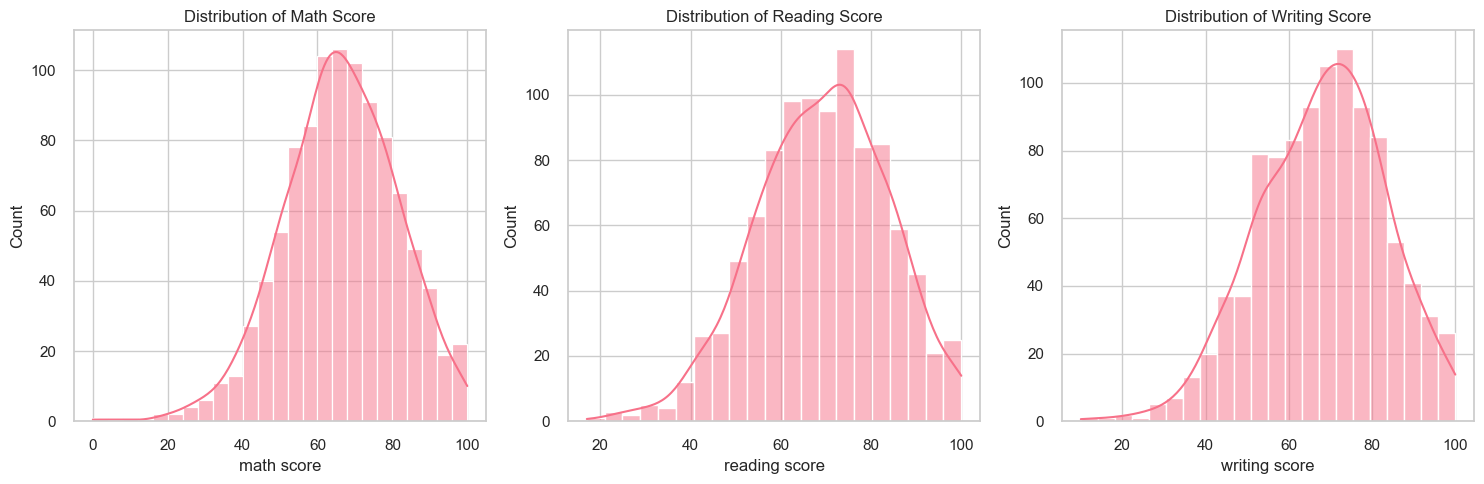

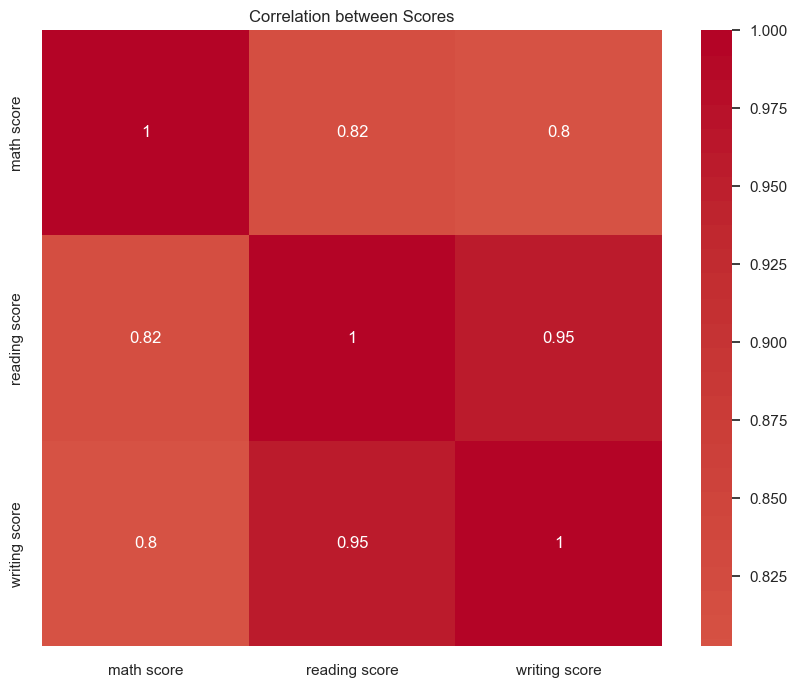

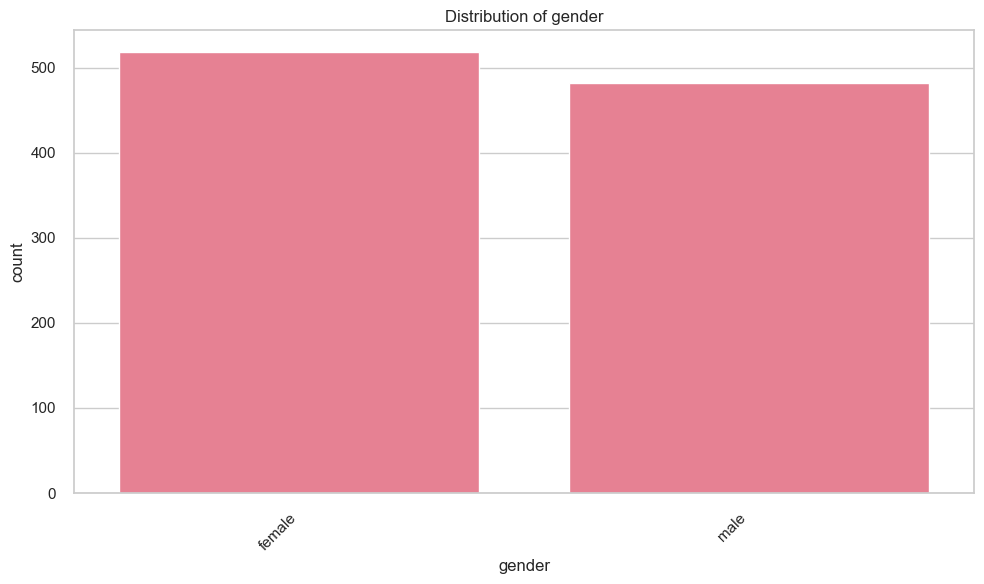


Distribution of gender:
female: 518 (51.8%)
male: 482 (48.2%)


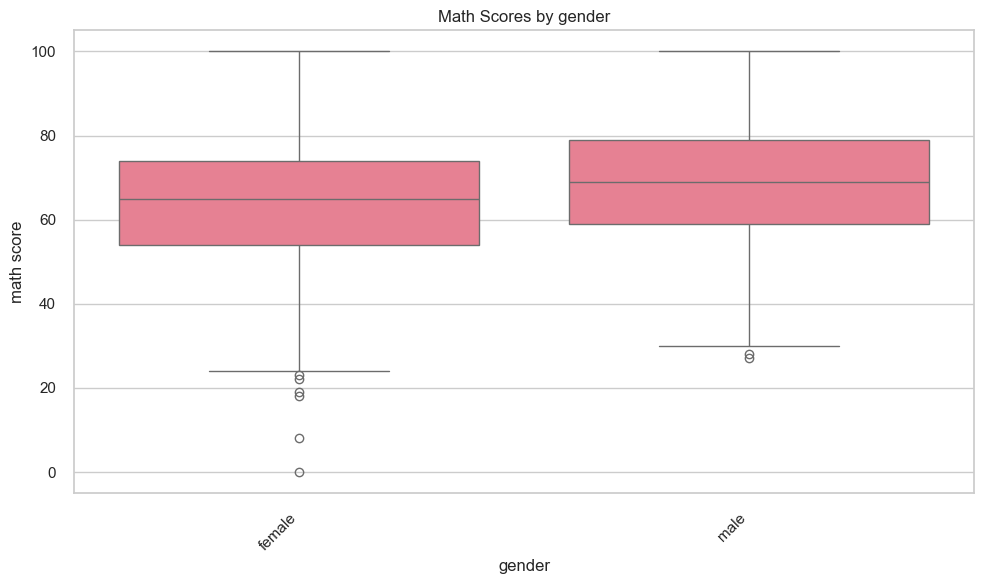


Math Score Statistics by gender:


mean  count    std
gender                     
female 63.630    518 15.490
male   68.730    482 14.360

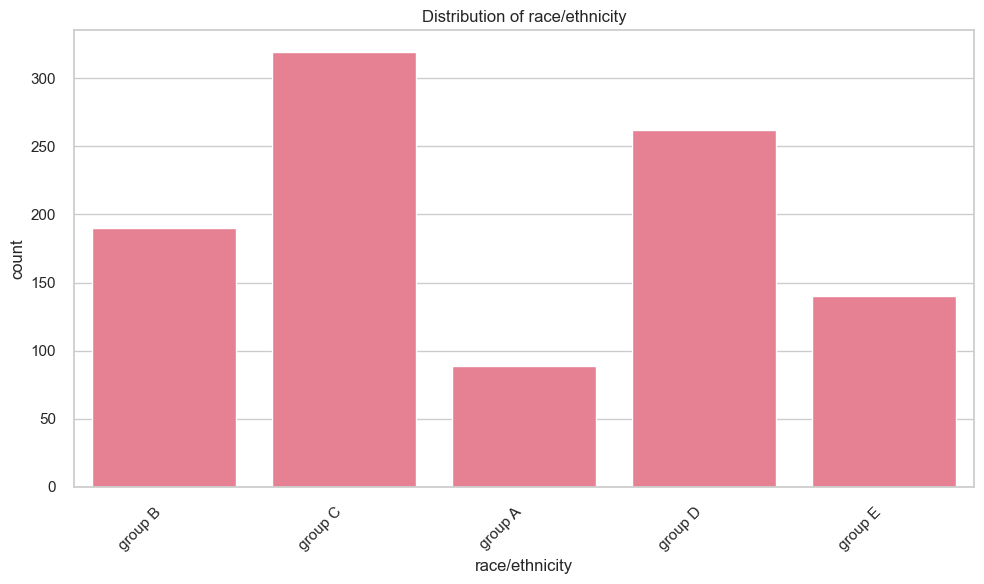


Distribution of race/ethnicity:
group C: 319 (31.9%)
group D: 262 (26.2%)
group B: 190 (19.0%)
group E: 140 (14.0%)
group A: 89 (8.9%)


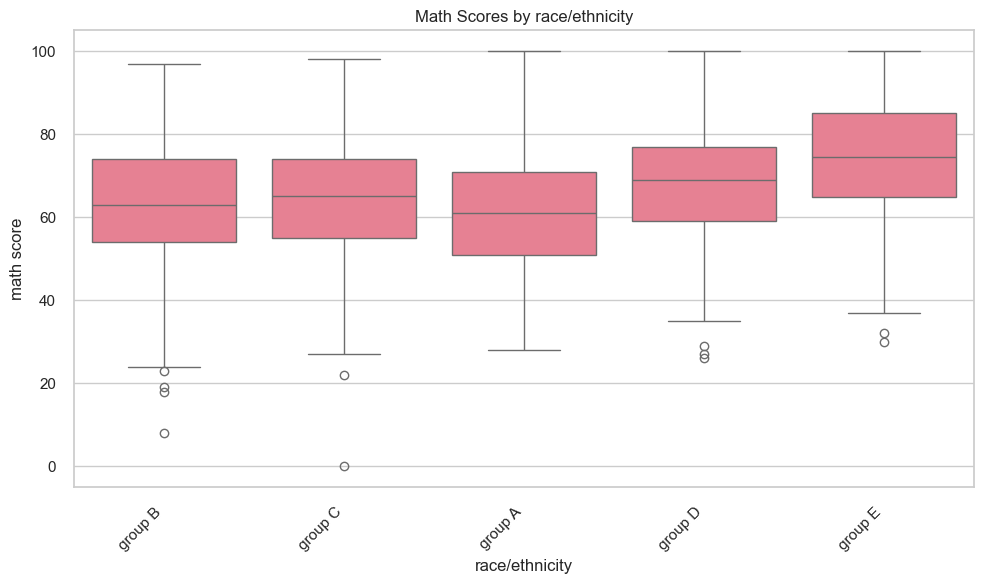


Math Score Statistics by race/ethnicity:


mean  count    std
race/ethnicity                     
group A        61.630     89 14.520
group B        63.450    190 15.470
group C        64.460    319 14.850
group D        67.360    262 13.770
group E        73.820    140 15.530

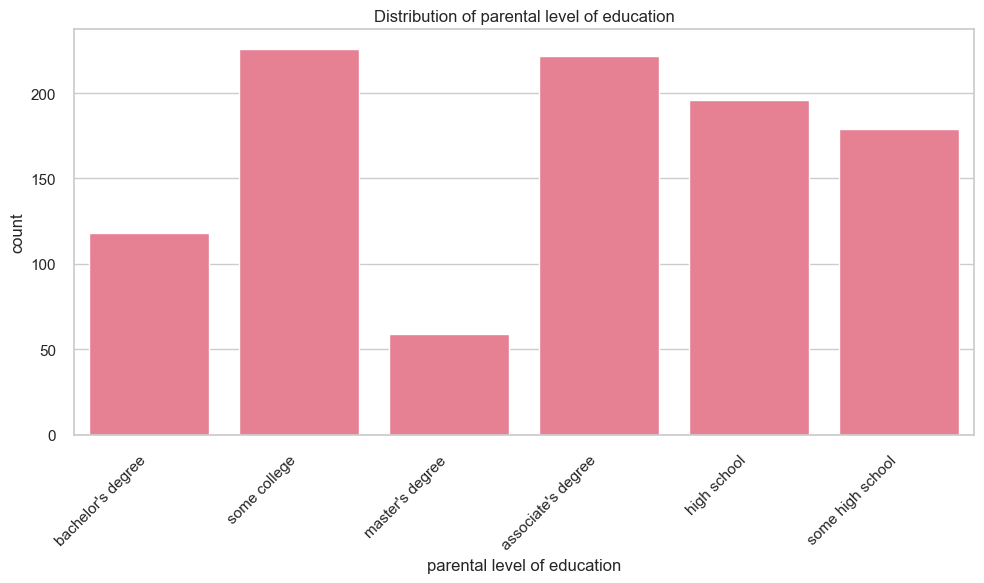


Distribution of parental level of education:
some college: 226 (22.6%)
associate's degree: 222 (22.2%)
high school: 196 (19.6%)
some high school: 179 (17.9%)
bachelor's degree: 118 (11.8%)
master's degree: 59 (5.9%)


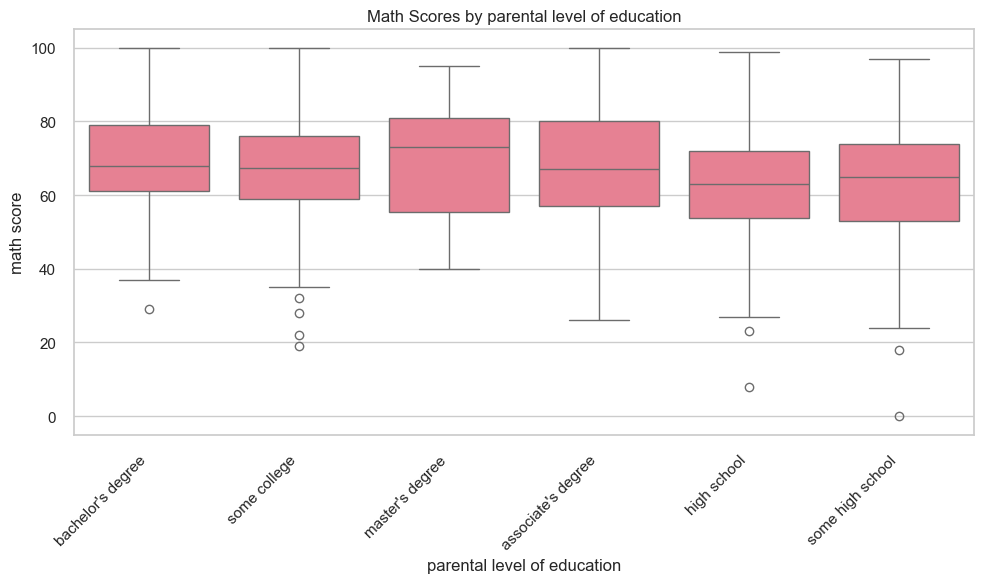


Math Score Statistics by parental level of education:


mean  count    std
parental level of education                     
associate's degree          67.880    222 15.110
bachelor's degree           69.390    118 14.940
high school                 62.140    196 14.540
master's degree             69.750     59 15.150
some college                67.130    226 14.310
some high school            63.500    179 15.930

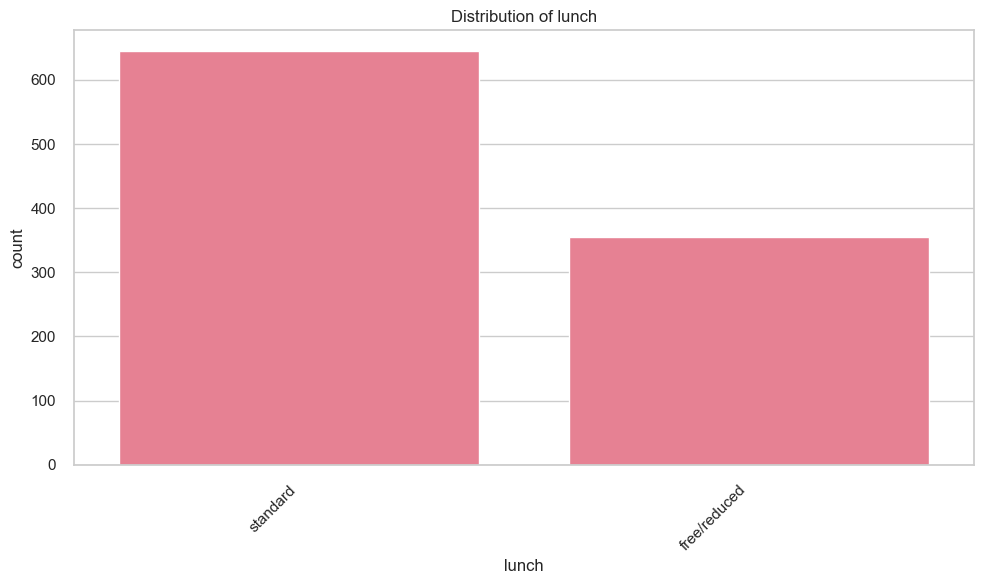


Distribution of lunch:
standard: 645 (64.5%)
free/reduced: 355 (35.5%)


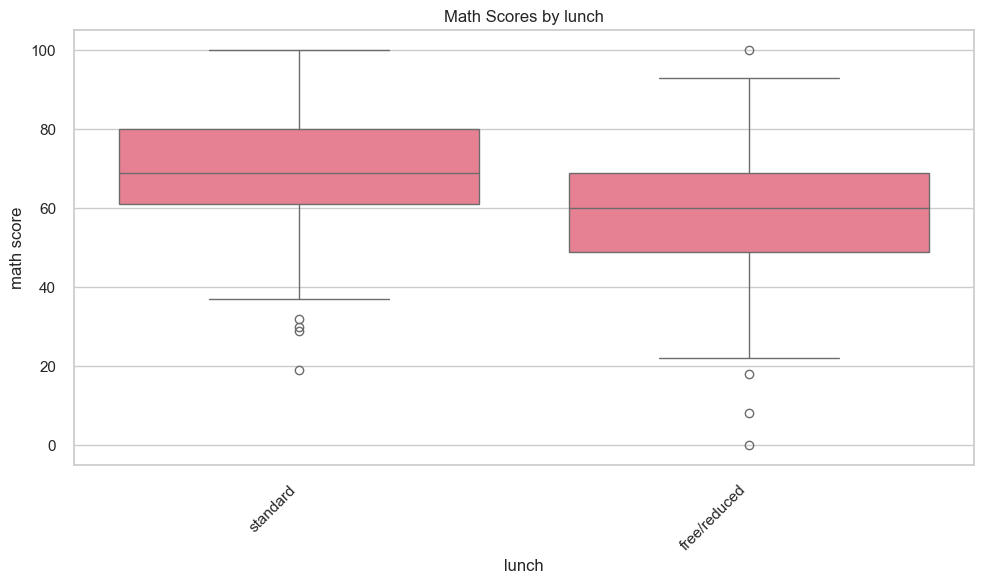


Math Score Statistics by lunch:


mean  count    std
lunch                            
free/reduced 58.920    355 15.160
standard     70.030    645 13.650

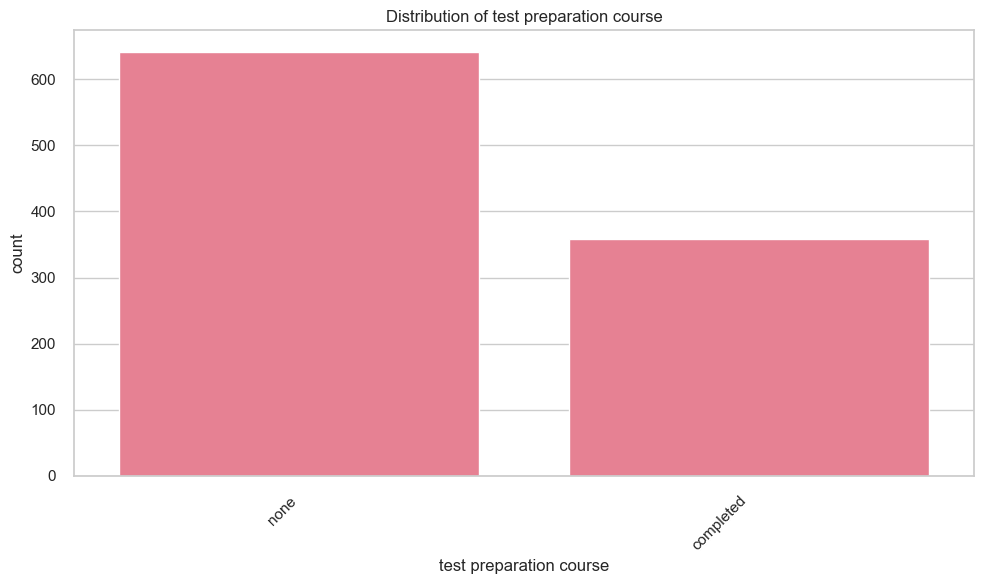


Distribution of test preparation course:
none: 642 (64.2%)
completed: 358 (35.8%)


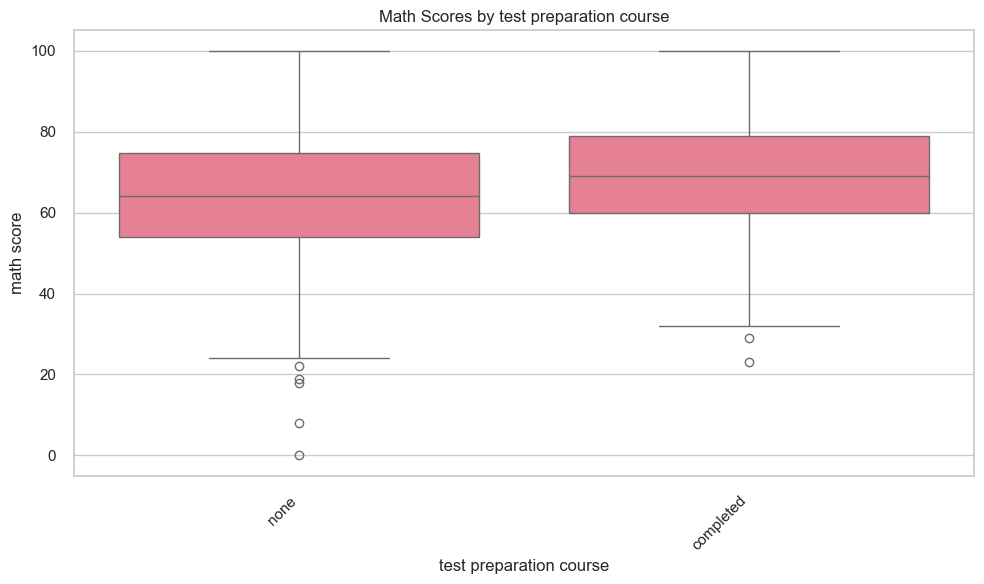


Math Score Statistics by test preparation course:


mean  count    std
test preparation course                     
completed               69.700    358 14.440
none                    64.080    642 15.190

In [4]:
# 1. Score Distributions and Correlations
plt.figure(figsize=(15, 5))

# Plot distributions for each score
for i, score in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=score, kde=True)
    plt.title(f'Distribution of {score.title()}')

plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
score_correlation = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(score_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Scores')
plt.show()

# 2. Categorical Variable Analysis
def analyze_categorical(data, column):
    # Distribution plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    value_counts = data[column].value_counts()
    percentages = value_counts / len(data) * 100
    print(f"\nDistribution of {column}:")
    for val, count in value_counts.items():
        print(f"{val}: {count} ({percentages[val]:.1f}%)")
    
    # Box plot with math scores
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column, y='math score')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Math Scores by {column}')
    plt.tight_layout()
    plt.show()
    
    # Average math score by category
    avg_scores = data.groupby(column)['math score'].agg(['mean', 'count', 'std']).round(2)
    print(f"\nMath Score Statistics by {column}:")
    display(avg_scores)

# Analyze each categorical variable
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 
                      'lunch', 'test preparation course']

for col in categorical_columns:
    print("\n" + "="*50)
    analyze_categorical(df, col)


## 3. Data Preprocessing and Feature Engineering

We'll prepare the data for modeling through these steps:
1. Outlier Detection and Handling
2. Categorical Variable Encoding
   - One-hot encoding for nominal variables
   - Ordinal encoding for education level
3. Feature Scaling
4. Feature Engineering
   - Average reading/writing scores
   - Test preparation and education interaction
5. Final Dataset Creation


In [5]:
# Create a copy of the original dataset
df_final = df.copy()

# 1. Outlier Detection
def flag_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Flag outliers for each score
for col in ['math score', 'reading score', 'writing score']:
    df_final[f'{col}_outlier'] = flag_outliers(df_final, col)
    outliers = df_final[df_final[f'{col}_outlier']]
    print(f"\nOutliers in {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values: {sorted(outliers[col].unique())}")

# 2. Categorical Variable Encoding
# One-hot encoding for nominal variables
nominal_columns = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot.fit_transform(df_final[nominal_columns])

# Get feature names after one-hot encoding
onehot_columns = []
for i, col in enumerate(nominal_columns):
    feature_names = [f"{col}_{val}" for val in onehot.categories_[i]]
    onehot_columns.extend(feature_names)

# Add one-hot encoded columns
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_columns, index=df_final.index)
df_final = pd.concat([df_final, onehot_df], axis=1)

# Ordinal encoding for parental education
education_order = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]
df_final['parental_education_level'] = pd.Categorical(
    df_final['parental level of education'],
    categories=education_order,
    ordered=True
).codes

# 3. Feature Scaling
scaler = MinMaxScaler()
score_columns = ['math score', 'reading score', 'writing score']
df_final[['math_score_scaled', 'reading_score_scaled', 'writing_score_scaled']] = \
    scaler.fit_transform(df_final[score_columns])

# 4. Feature Engineering
# Average of reading/writing scores
df_final['avg_reading_writing'] = df_final[['reading score', 'writing score']].mean(axis=1)
df_final['avg_reading_writing_scaled'] = scaler.fit_transform(df_final[['avg_reading_writing']])

# Interaction between test preparation and parental education
df_final['prep_education_interaction'] = \
    (df_final['test preparation course'] == 'completed').astype(int) * df_final['parental_education_level']

# 5. Final Dataset Organization
final_columns = [
    # Original scores
    'math score', 'reading score', 'writing score',
    
    # Scaled scores
    'math_score_scaled', 'reading_score_scaled', 'writing_score_scaled',
    
    # One-hot encoded categorical variables
    *onehot_columns,
    
    # Ordinal encoded education
    'parental_education_level',
    
    # Engineered features
    'avg_reading_writing', 'avg_reading_writing_scaled',
    'prep_education_interaction',
    
    # Outlier flags
    'math score_outlier', 'reading score_outlier', 'writing score_outlier'
]

# Create and save final cleaned dataset
df_final_clean = df_final[final_columns]
df_final_clean.to_csv('../data/StudentsPerformance_cleaned.csv', index=False)

# Display information about the cleaned dataset
print("\nCleaned Dataset Information:")
print("-" * 40)
print("\nShape:", df_final_clean.shape)
print("\nFeatures:", len(df_final_clean.columns))
print("\nSample of numerical features:")
display(df_final_clean[['math score', 'math_score_scaled', 'avg_reading_writing', 'prep_education_interaction']].head())
print("\nSample of categorical features:")
display(df_final_clean[onehot_columns[:5]].head())
print("\nMissing values check:")
display(df_final_clean.isnull().sum())



Outliers in math score:
Number of outliers: 8
Outlier values: [0, 8, 18, 19, 22, 23, 24, 26]

Outliers in reading score:
Number of outliers: 6
Outlier values: [17, 23, 24, 26, 28]

Outliers in writing score:
Number of outliers: 5
Outlier values: [10, 15, 19, 22, 23]

Cleaned Dataset Information:
----------------------------------------

Shape: (1000, 24)

Features: 24

Sample of numerical features:


math score  math_score_scaled  avg_reading_writing  \
0          72              0.720               73.000   
1          69              0.690               89.000   
2          90              0.900               94.000   
3          47              0.470               50.500   
4          76              0.760               76.500   

   prep_education_interaction  
0                           0  
1                           2  
2                           0  
3                           0  
4                           0


Sample of categorical features:


gender_female  gender_male  race/ethnicity_group A  race/ethnicity_group B  \
0          1.000        0.000                   0.000                   1.000   
1          1.000        0.000                   0.000                   0.000   
2          1.000        0.000                   0.000                   1.000   
3          0.000        1.000                   1.000                   0.000   
4          0.000        1.000                   0.000                   0.000   

   race/ethnicity_group C  
0                   0.000  
1                   1.000  
2                   0.000  
3                   0.000  
4                   1.000


Missing values check:


math score                           0
reading score                        0
writing score                        0
math_score_scaled                    0
reading_score_scaled                 0
writing_score_scaled                 0
gender_female                        0
gender_male                          0
race/ethnicity_group A               0
race/ethnicity_group B               0
race/ethnicity_group C               0
race/ethnicity_group D               0
race/ethnicity_group E               0
lunch_free/reduced                   0
lunch_standard                       0
test preparation course_completed    0
test preparation course_none         0
parental_education_level             0
avg_reading_writing                  0
avg_reading_writing_scaled           0
prep_education_interaction           0
math score_outlier                   0
reading score_outlier                0
writing score_outlier                0
dtype: int64

## Analysis of Preprocessing Impact

Now that we've completed our preprocessing steps, let's analyze how our transformations have improved the dataset for modeling:


In [6]:
# Analyze the impact of our preprocessing steps

# 1. Feature Importance Analysis
print("Feature Correlations with Math Score:")
correlations = df_final_clean.corr()['math score'].sort_values(ascending=False)
display(correlations)

# 2. Impact of Preprocessing
print("\nPreprocessing Impact:")
print(f"Original features: {len(df.columns)} -> Preprocessed features: {len(df_final_clean.columns)}")
print("\nNew feature types:")
print(df_final_clean.dtypes.value_counts())

# 3. Engineered Feature Analysis
print("\nEngineered Feature Statistics:")
engineered_features = ['avg_reading_writing', 'prep_education_interaction']
display(df_final_clean[engineered_features].describe())

# 4. Data Quality Verification
print("\nFinal Data Quality Check:")
print(f"Total samples maintained: {len(df_final_clean)} (no data loss)")
print(f"Missing values: {df_final_clean.isnull().sum().sum()} (data completeness verified)")
print("\nOutlier Flagging Results:")
for col in ['math score', 'reading score', 'writing score']:
    outliers = df_final_clean[f'{col}_outlier'].sum()
    print(f"{col}: {outliers} outliers ({outliers/len(df_final_clean)*100:.1f}%) flagged")

# 5. Feature Transformation Summary
print("\nFeature Transformation Summary:")
print("1. Categorical Encodings:")
print("   - One-hot encoded:", [col for col in df_final_clean.columns if any(prefix in col for prefix in ['gender_', 'race/ethnicity_', 'lunch_', 'test preparation course_'])])
print("   - Ordinal encoded: parental_education_level")
print("\n2. Numerical Transformations:")
print("   - Scaled features:", [col for col in df_final_clean.columns if col.endswith('_scaled')])
print("\n3. Engineered Features:")
print("   - Combined metrics:", engineered_features)
print("   - Outlier flags:", [col for col in df_final_clean.columns if col.endswith('_outlier')])


Feature Correlations with Math Score:


math score                           1.000
math_score_scaled                    1.000
avg_reading_writing_scaled           0.819
avg_reading_writing                  0.819
reading_score_scaled                 0.818
reading score                        0.818
writing score                        0.803
writing_score_scaled                 0.803
lunch_standard                       0.351
race/ethnicity_group E               0.206
prep_education_interaction           0.195
test preparation course_completed    0.178
gender_male                          0.168
parental_education_level             0.159
race/ethnicity_group D               0.050
race/ethnicity_group C              -0.073
race/ethnicity_group B              -0.084
race/ethnicity_group A              -0.092
gender_female                       -0.168
test preparation course_none        -0.178
writing score_outlier               -0.219
reading score_outlier               -0.227
math score_outlier                  -0.288
lunch_free/


Preprocessing Impact:
Original features: 8 -> Preprocessed features: 24

New feature types:
float64    16
int64       4
bool        3
int8        1
Name: count, dtype: int64

Engineered Feature Statistics:


avg_reading_writing  prep_education_interaction
count             1000.000                    1000.000
mean                68.612                       0.740
std                 14.728                       1.339
min                 13.500                       0.000
25%                 58.500                       0.000
50%                 69.500                       0.000
75%                 79.000                       1.000
max                100.000                       5.000


Final Data Quality Check:
Total samples maintained: 1000 (no data loss)
Missing values: 0 (data completeness verified)

Outlier Flagging Results:
math score: 8 outliers (0.8%) flagged
reading score: 6 outliers (0.6%) flagged
writing score: 5 outliers (0.5%) flagged

Feature Transformation Summary:
1. Categorical Encodings:
   - One-hot encoded: ['gender_female', 'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', 'lunch_free/reduced', 'lunch_standard', 'test preparation course_completed', 'test preparation course_none']
   - Ordinal encoded: parental_education_level

2. Numerical Transformations:
   - Scaled features: ['math_score_scaled', 'reading_score_scaled', 'writing_score_scaled', 'avg_reading_writing_scaled']

3. Engineered Features:
   - Combined metrics: ['avg_reading_writing', 'prep_education_interaction']
   - Outlier flags: ['math score_outlier', 'reading score_outlier', 'writing s

## Summary of Findings

After our exploratory data analysis and preprocessing, here are the key insights:

1. **Score Distributions**
   - Math, reading, and writing scores are roughly normally distributed
   - Strong correlations exist between all three scores
   - Math scores show slightly more variance than reading and writing

2. **Categorical Variables**
   - Gender: Fairly balanced distribution (51.8% female, 48.2% male)
   - Race/Ethnicity: Five groups with varying representations
   - Parental Education: Most common is "some college" (22.6%)
   - Lunch: 64.5% standard, 35.5% free/reduced
   - Test Preparation: 64.2% none, 35.8% completed

3. **Feature Engineering Results**
   - Created scaled versions of all scores
   - Generated average reading/writing score feature
   - Added interaction between test prep and parental education
   - Flagged outliers in each score type

4. **Final Dataset**
   - Shape: (1000, 24) - 1000 students, 24 features
   - No missing values
   - Mix of original, scaled, and engineered features
   - Saved as 'StudentsPerformance_cleaned.csv'


## Advanced Data Preprocessing Analysis

Let's analyze each preprocessing decision carefully:
1. Outlier analysis and impact
2. Encoding method comparison
3. Feature scaling evaluation
4. Feature importance and selection



Outlier Analysis for math score:
Lower bound: 27.00
Upper bound: 107.00
Number of outliers: 8

Sample of outlier records:


gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38             27  
466                    none          26             31             38

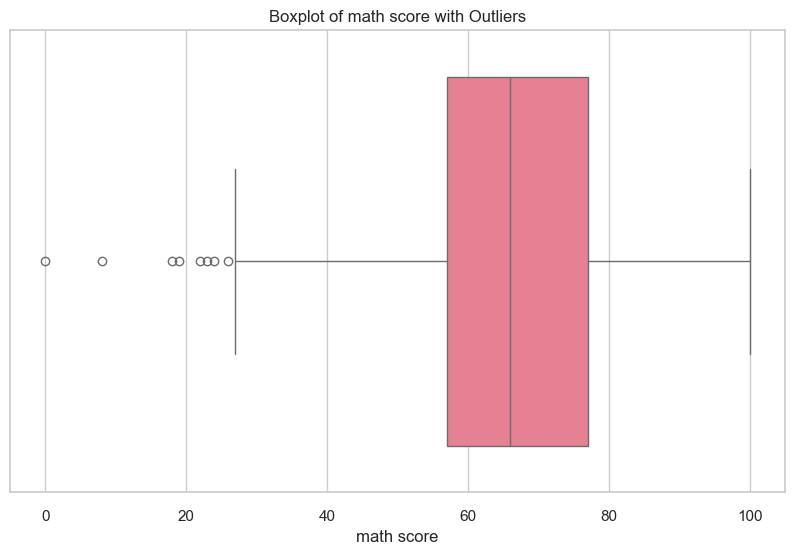

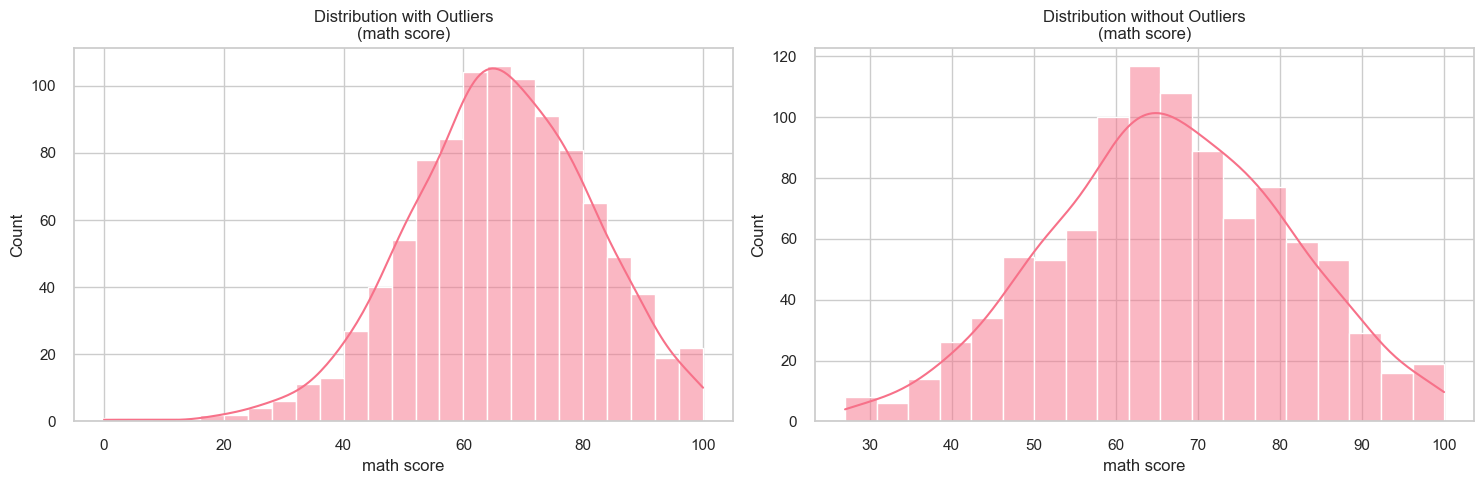


Outlier Analysis for reading score:
Lower bound: 29.00
Upper bound: 109.00
Number of outliers: 6

Sample of outlier records:


gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
211    male        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
59                     none           0             17             10  
76                     none          30             26             22  
211                    none          35             28             27  
327                    none          28             23             19  
596                    none          30             24             15

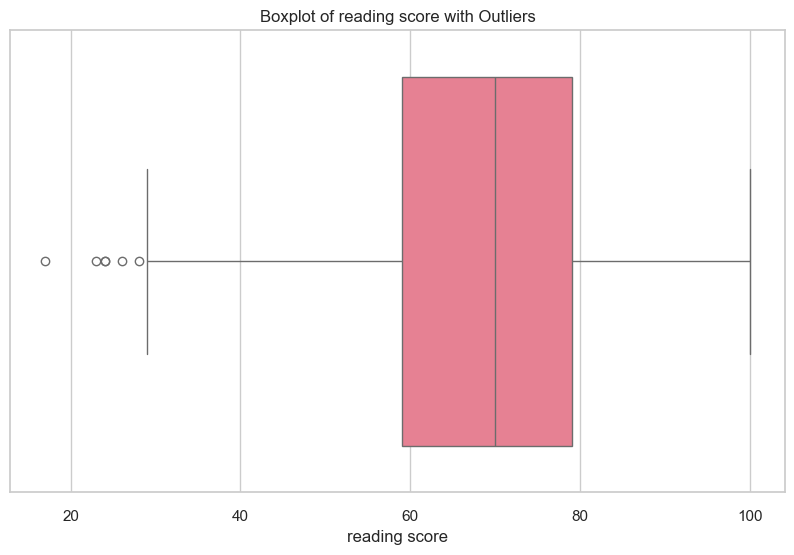

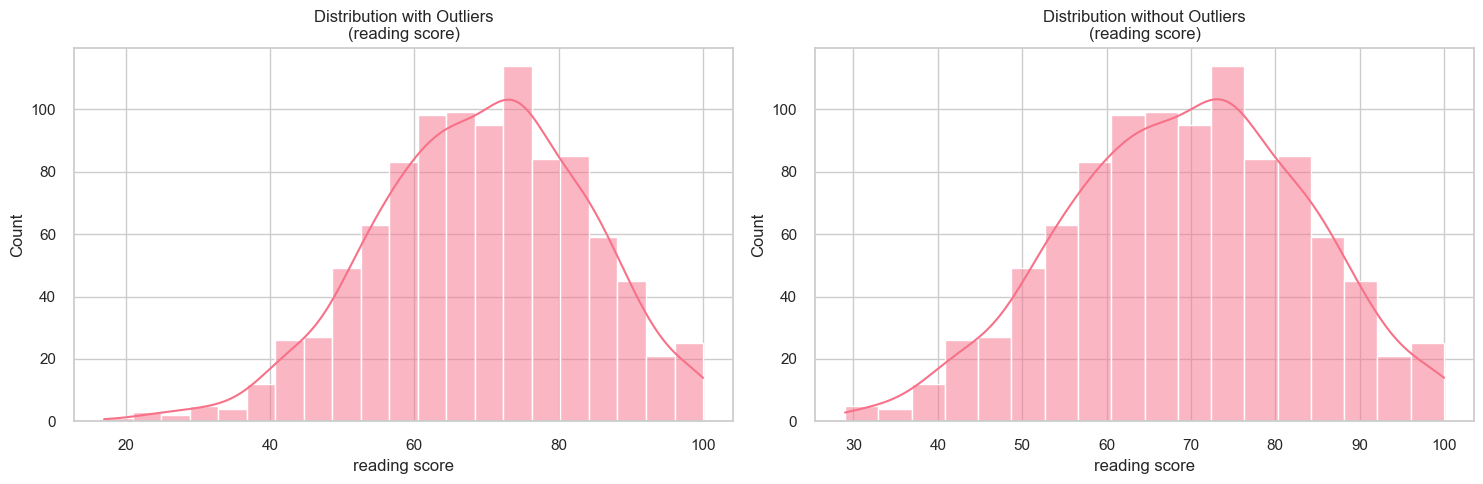


Outlier Analysis for writing score:
Lower bound: 25.88
Upper bound: 110.88
Number of outliers: 5

Sample of outlier records:


gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
59                     none           0             17             10  
76                     none          30             26             22  
327                    none          28             23             19  
596                    none          30             24             15  
980                    none           8             24             23

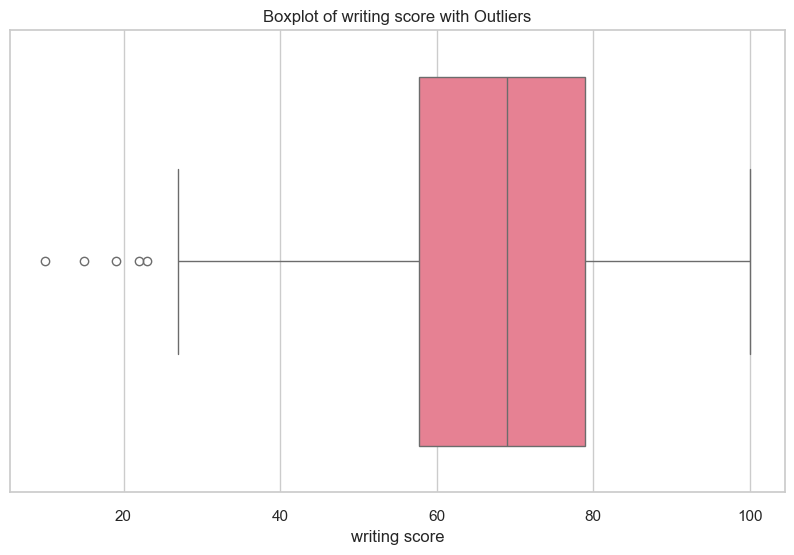

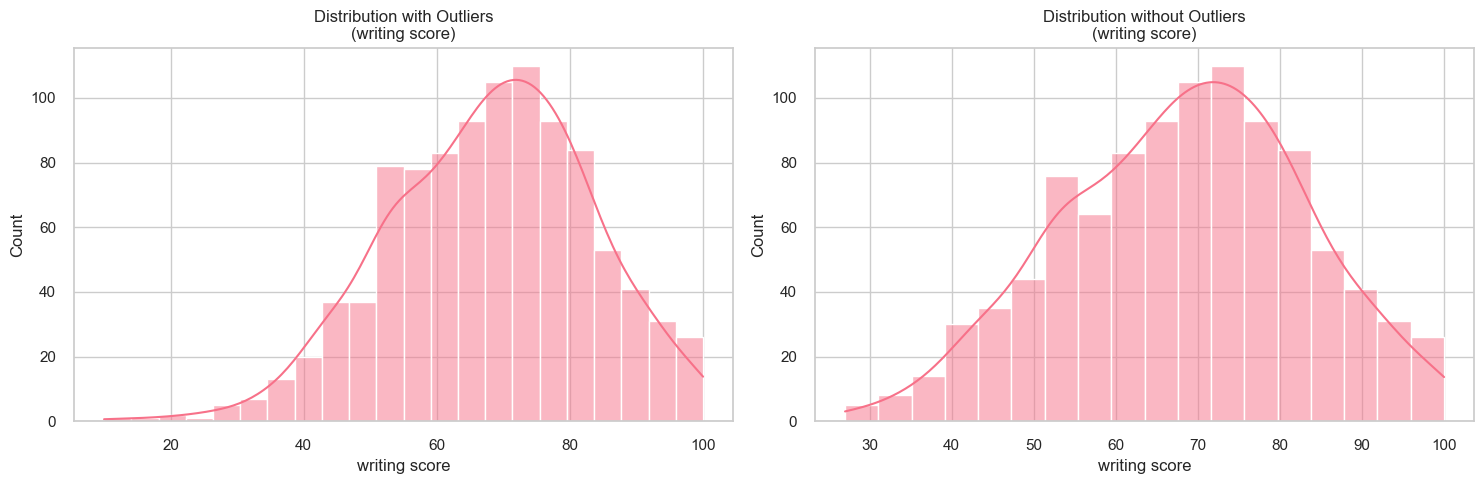


Overlap Analysis:
Total unique students with outlier scores: 12
Students with outlier math score: 8
Students with outlier reading score: 6
Students with outlier writing score: 5


In [7]:
# 1. Detailed Outlier Analysis

def analyze_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"\nOutlier Analysis for {column}:")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print("\nSample of outlier records:")
    display(outliers.head())
    
    # Visualize with boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()
    
    # Distribution with and without outliers
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=data[column], kde=True)
    plt.title(f'Distribution with Outliers\n({column})')
    
    plt.subplot(1, 2, 2)
    clean_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    sns.histplot(data=clean_data[column], kde=True)
    plt.title(f'Distribution without Outliers\n({column})')
    
    plt.tight_layout()
    plt.show()
    
    return outliers

# Analyze outliers for each score
score_columns = ['math score', 'reading score', 'writing score']
outliers_by_column = {}

for col in score_columns:
    outliers_by_column[col] = analyze_outliers(df, col)

# Check if same students are outliers across multiple subjects
all_outlier_indices = set()
for outliers in outliers_by_column.values():
    all_outlier_indices.update(outliers.index)

print("\nOverlap Analysis:")
print(f"Total unique students with outlier scores: {len(all_outlier_indices)}")
for col, outliers in outliers_by_column.items():
    print(f"Students with outlier {col}: {len(outliers)}")



Analyzing encoding methods for: gender


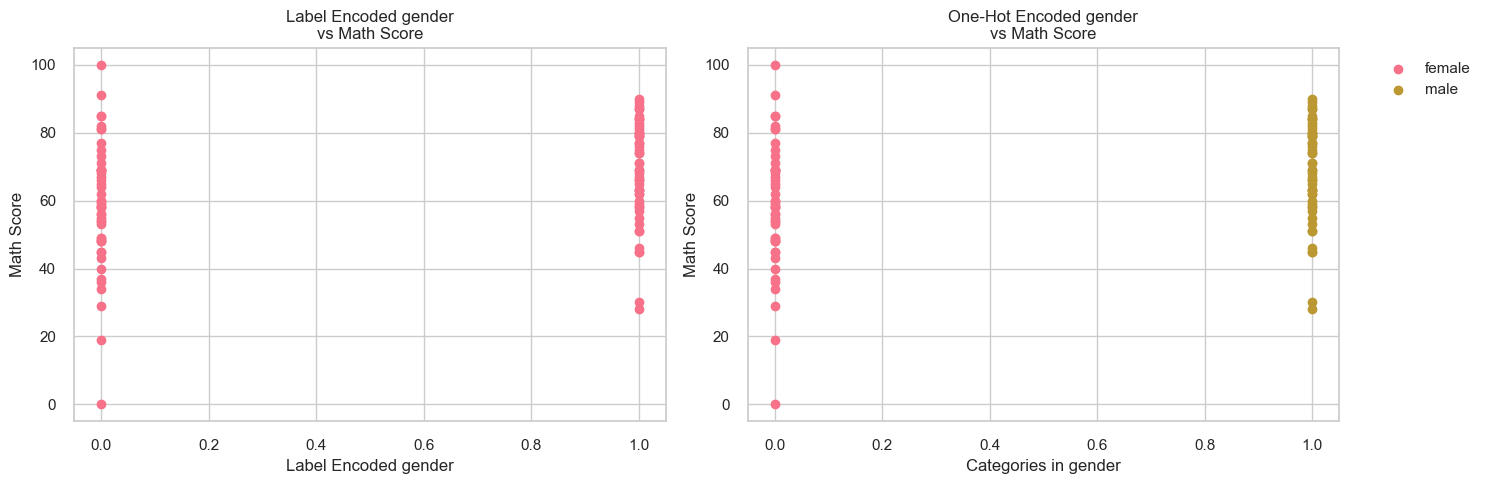


Analyzing encoding methods for: race/ethnicity


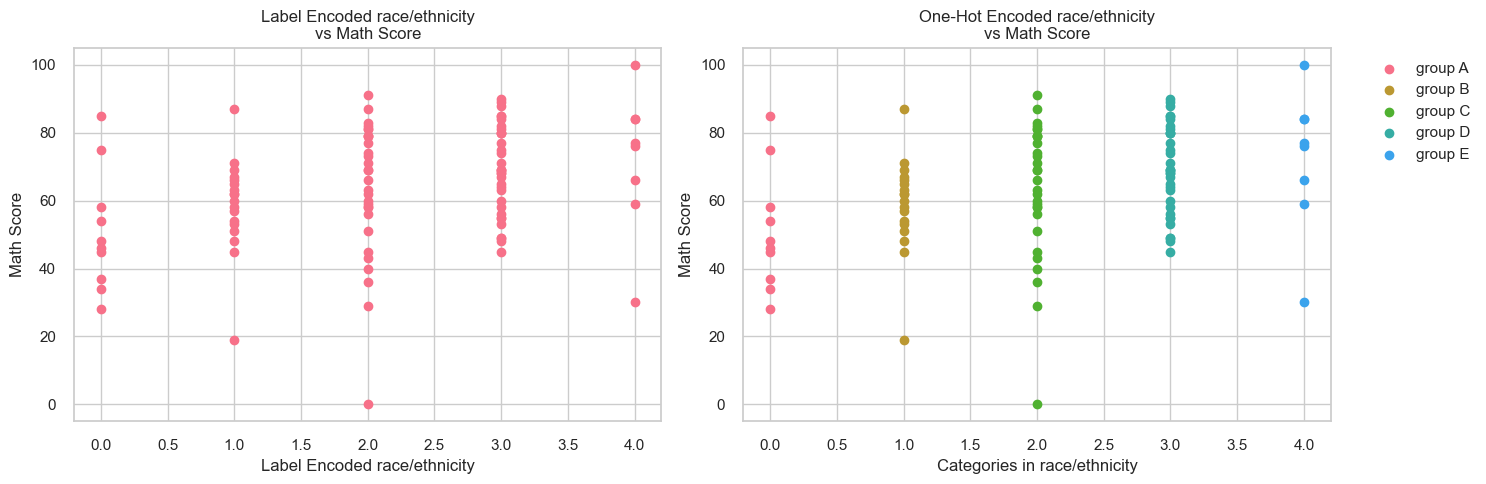


Analyzing encoding methods for: parental level of education


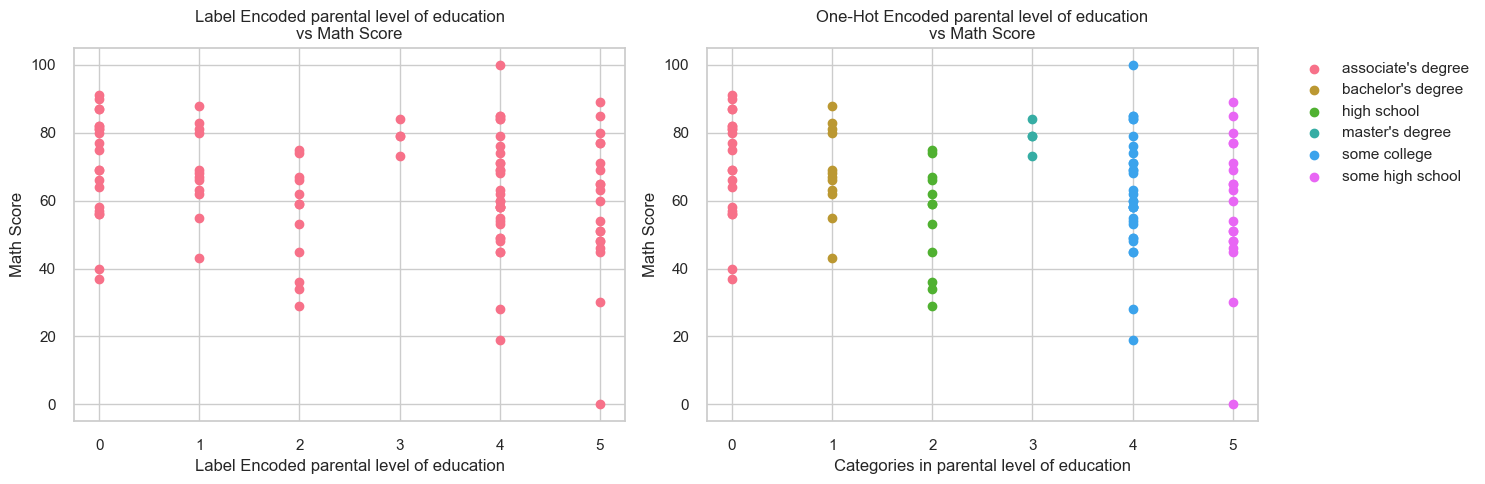


Analyzing encoding methods for: lunch


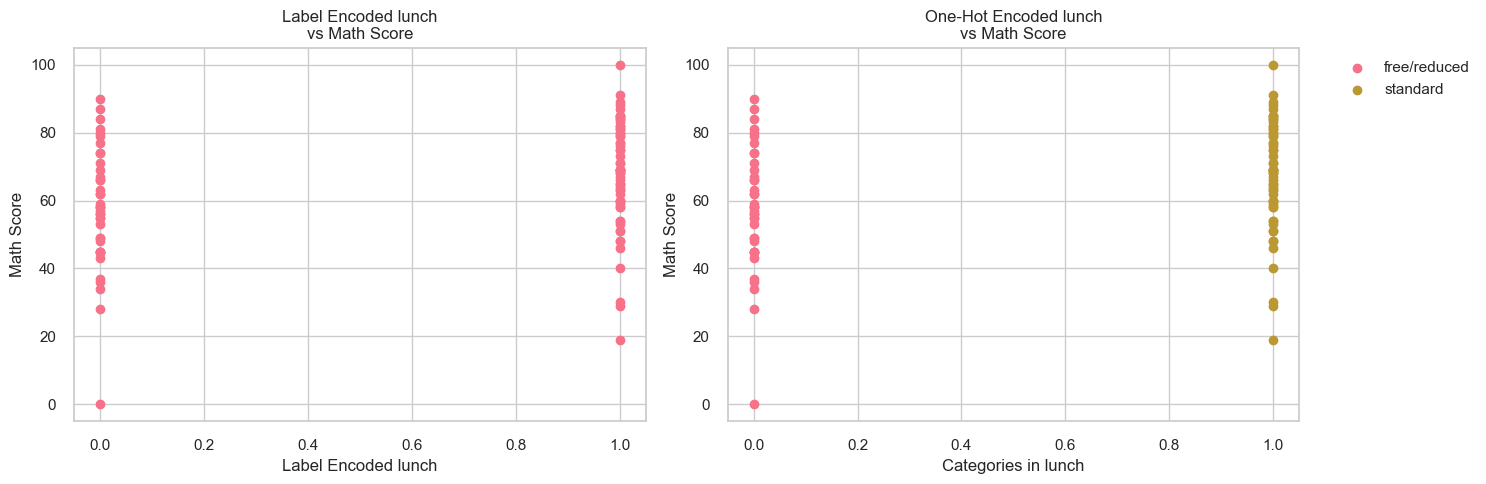


Analyzing encoding methods for: test preparation course


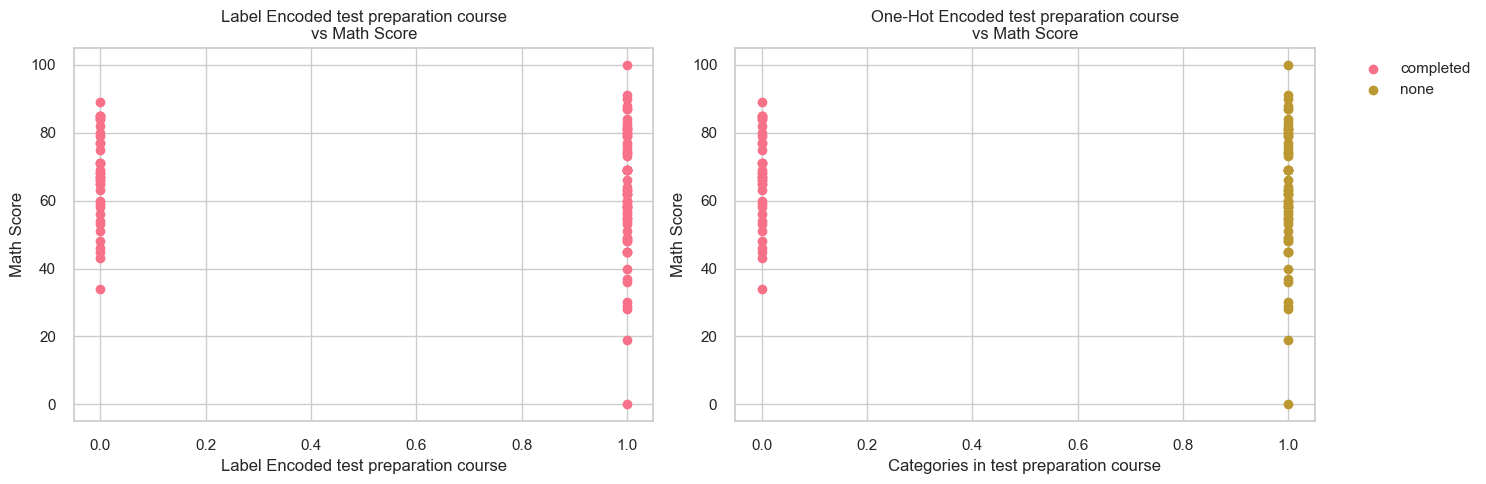

In [8]:
# 2. Encoding Method Comparison

# Create sample of data for visualization
sample_size = min(100, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

# Compare Label Encoding vs One-Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Function to compare encodings
def compare_encodings(data, column):
    # Label Encoding
    le = LabelEncoder()
    label_encoded = le.fit_transform(data[column])
    
    # One-Hot Encoding
    ohe = OneHotEncoder(sparse_output=False)
    onehot_encoded = ohe.fit_transform(data[[column]])
    
    # Visualize relationship with math score
    plt.figure(figsize=(15, 5))
    
    # Label Encoded
    plt.subplot(1, 2, 1)
    plt.scatter(label_encoded, data['math score'])
    plt.title(f'Label Encoded {column}\nvs Math Score')
    plt.xlabel(f'Label Encoded {column}')
    plt.ylabel('Math Score')
    
    # One-Hot Encoded
    plt.subplot(1, 2, 2)
    for i in range(onehot_encoded.shape[1]):
        category = ohe.categories_[0][i]
        mask = onehot_encoded[:, i] == 1
        plt.scatter(np.full(mask.sum(), i), data.loc[mask, 'math score'], 
                   label=category)
    plt.title(f'One-Hot Encoded {column}\nvs Math Score')
    plt.xlabel(f'Categories in {column}')
    plt.ylabel('Math Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Compare encodings for categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 
                      'lunch', 'test preparation course']

for col in categorical_columns:
    print(f"\nAnalyzing encoding methods for: {col}")
    compare_encodings(df_sample, col)


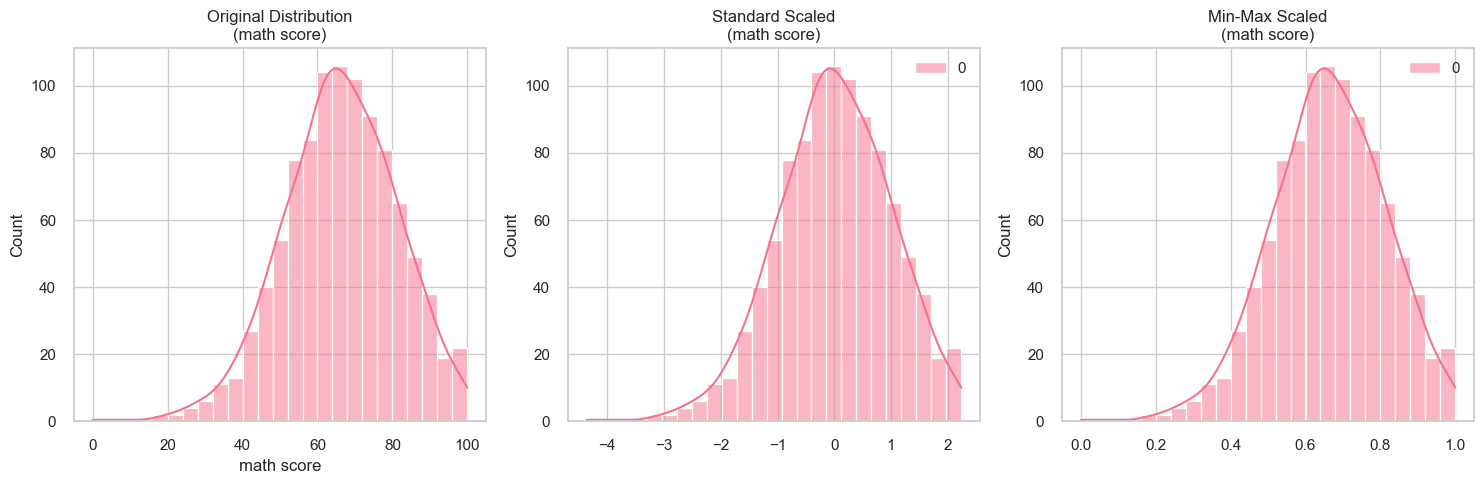


Scaling Statistics for math score:

Original Data:
Mean: 66.09
Std: 15.16
Min: 0.00
Max: 100.00

Standard Scaled:
Mean: 0.00
Std: 1.00
Min: -4.36
Max: 2.24

Min-Max Scaled:
Mean: 0.66
Std: 0.15
Min: 0.00
Max: 1.00


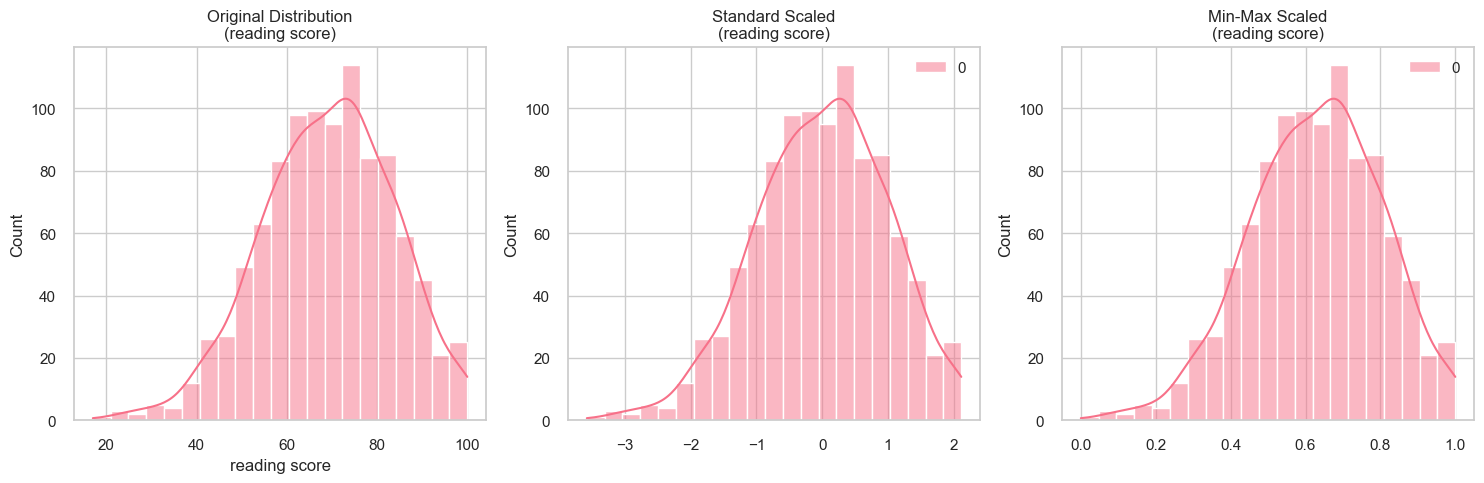


Scaling Statistics for reading score:

Original Data:
Mean: 69.17
Std: 14.60
Min: 17.00
Max: 100.00

Standard Scaled:
Mean: 0.00
Std: 1.00
Min: -3.57
Max: 2.11

Min-Max Scaled:
Mean: 0.63
Std: 0.18
Min: 0.00
Max: 1.00


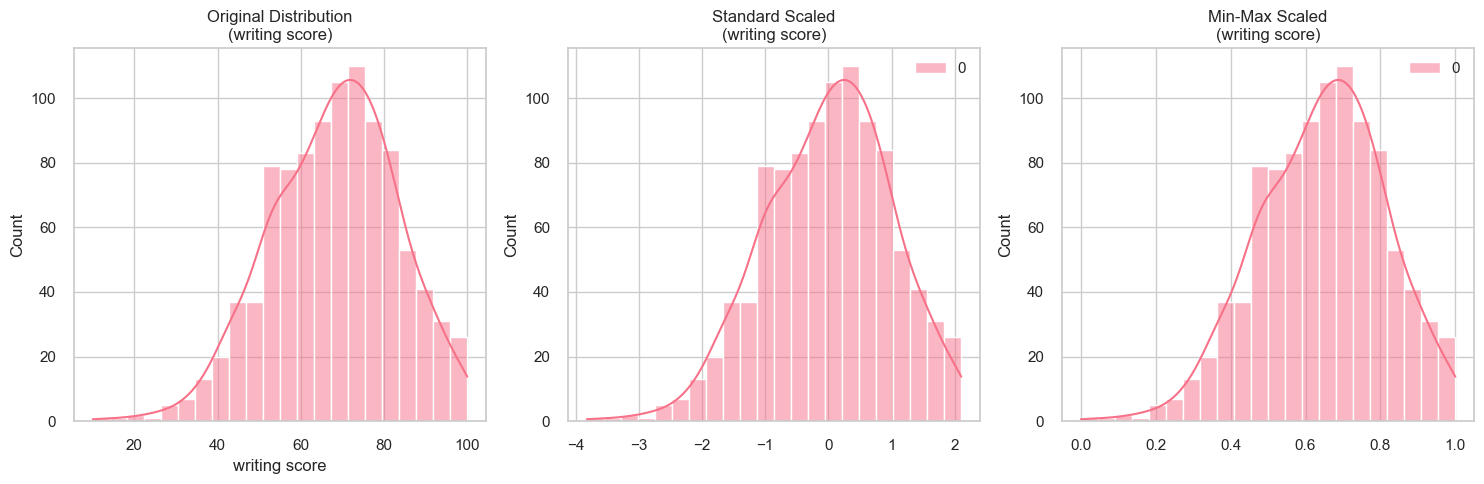


Scaling Statistics for writing score:

Original Data:
Mean: 68.05
Std: 15.20
Min: 10.00
Max: 100.00

Standard Scaled:
Mean: -0.00
Std: 1.00
Min: -3.82
Max: 2.10

Min-Max Scaled:
Mean: 0.65
Std: 0.17
Min: 0.00
Max: 1.00


In [9]:
# 3. Feature Scaling Analysis

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Function to compare scaling methods
def compare_scaling(data, column):
    # Standard Scaling
    std_scaler = StandardScaler()
    standard_scaled = std_scaler.fit_transform(data[[column]])
    
    # Min-Max Scaling
    minmax_scaler = MinMaxScaler()
    minmax_scaled = minmax_scaler.fit_transform(data[[column]])
    
    # Visualize distributions
    plt.figure(figsize=(15, 5))
    
    # Original
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Original Distribution\n({column})')
    
    # Standard Scaled
    plt.subplot(1, 3, 2)
    sns.histplot(standard_scaled, kde=True)
    plt.title(f'Standard Scaled\n({column})')
    
    # Min-Max Scaled
    plt.subplot(1, 3, 3)
    sns.histplot(minmax_scaled, kde=True)
    plt.title(f'Min-Max Scaled\n({column})')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nScaling Statistics for {column}:")
    print("\nOriginal Data:")
    print(f"Mean: {data[column].mean():.2f}")
    print(f"Std: {data[column].std():.2f}")
    print(f"Min: {data[column].min():.2f}")
    print(f"Max: {data[column].max():.2f}")
    
    print("\nStandard Scaled:")
    print(f"Mean: {standard_scaled.mean():.2f}")
    print(f"Std: {standard_scaled.std():.2f}")
    print(f"Min: {standard_scaled.min():.2f}")
    print(f"Max: {standard_scaled.max():.2f}")
    
    print("\nMin-Max Scaled:")
    print(f"Mean: {minmax_scaled.mean():.2f}")
    print(f"Std: {minmax_scaled.std():.2f}")
    print(f"Min: {minmax_scaled.min():.2f}")
    print(f"Max: {minmax_scaled.max():.2f}")

# Compare scaling for score columns
for col in score_columns:
    compare_scaling(df, col)


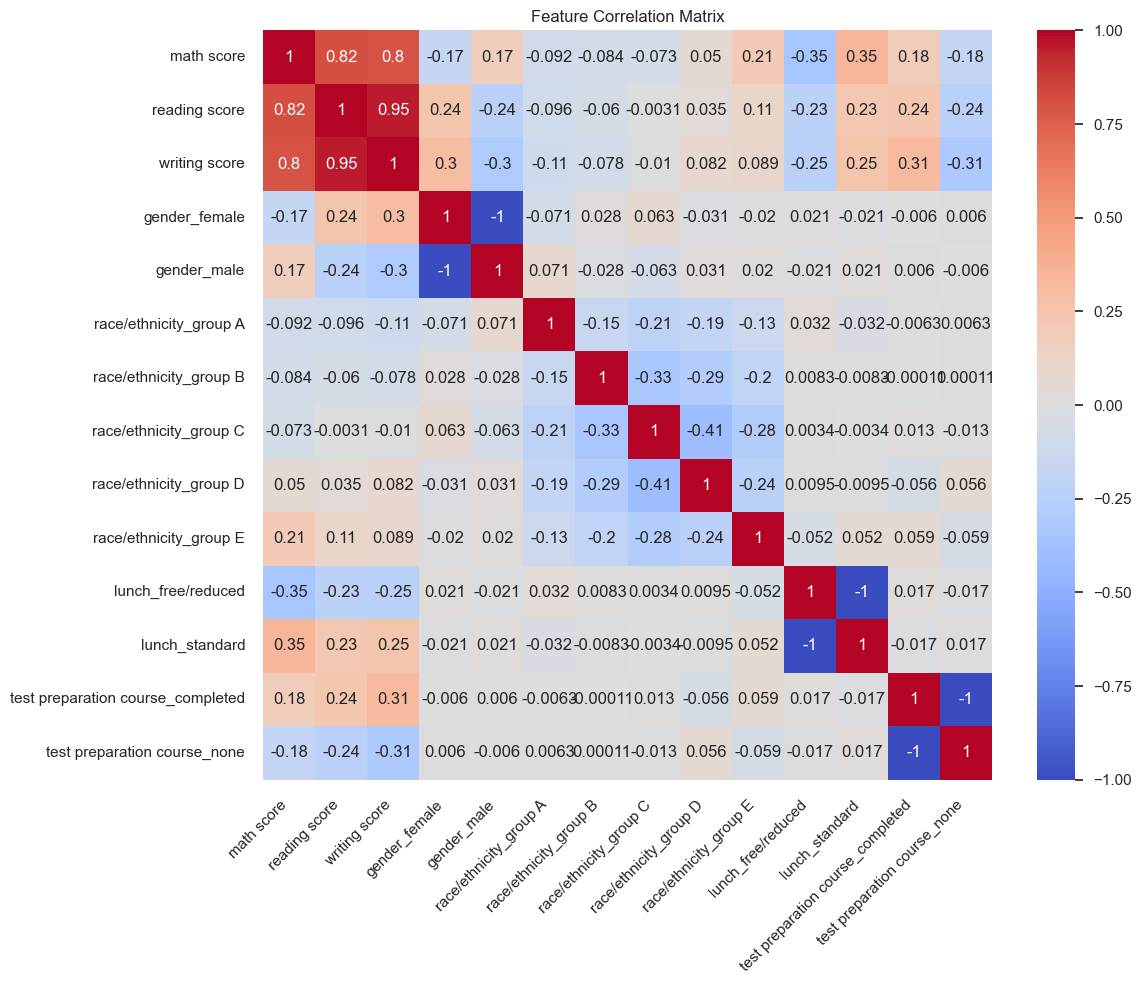


Feature Correlations with Math Score:
math score                           1.000
reading score                        0.818
writing score                        0.803
lunch_standard                       0.351
race/ethnicity_group E               0.206
test preparation course_completed    0.178
gender_male                          0.168
race/ethnicity_group D               0.050
race/ethnicity_group C              -0.073
race/ethnicity_group B              -0.084
race/ethnicity_group A              -0.092
gender_female                       -0.168
test preparation course_none        -0.178
lunch_free/reduced                  -0.351
Name: math score, dtype: float64

Average Math Score by Category:

gender:
         mean  count    std
gender                     
female 63.630    518 15.490
male   68.730    482 14.360

race/ethnicity:
                 mean  count    std
race/ethnicity                     
group A        61.630     89 14.520
group B        63.450    190 15.470
group C    

In [10]:
# 4. Feature Importance Analysis

# Create correlation matrix for all variables (including encoded ones)
df_encoded = df_final.copy()

# Select numerical columns and one-hot encoded columns
numerical_cols = ['math score', 'reading score', 'writing score']
encoded_cols = [col for col in df_encoded.columns if any(col.startswith(prefix) for prefix in ['gender_', 'race/ethnicity_', 'lunch_', 'test preparation course_'])]
analysis_cols = numerical_cols + encoded_cols

# Calculate correlation matrix
correlation_matrix = df_encoded[analysis_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate and sort correlations with math score
math_correlations = correlation_matrix['math score'].sort_values(ascending=False)
print("\nFeature Correlations with Math Score:")
print(math_correlations)

# Additional analysis: Average math score by category
print("\nAverage Math Score by Category:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df.groupby(col)['math score'].agg(['mean', 'count', 'std']).round(2))


## Additional Analysis of Preprocessed Data

Now that we have our preprocessed dataset (created in Section 3), let's analyze:
1. Feature importance and relationships
2. Impact of our preprocessing steps
3. Validation of engineered features
4. Final dataset quality checks


In [11]:
# Analyze the preprocessed dataset (df_final_clean)

# 1. Feature Importance Analysis
print("Feature Correlations with Math Score:")
correlations = df_final_clean.corr()['math score'].sort_values(ascending=False)
display(correlations)

# 2. Impact of Preprocessing
print("\nImpact of Preprocessing:")
print(f"Original features: {len(df.columns)}")
print(f"Preprocessed features: {len(df_final_clean.columns)}")
print("\nFeature types:")
print(df_final_clean.dtypes.value_counts())

# 3. Engineered Feature Analysis
print("\nEngineered Feature Statistics:")
engineered_features = ['avg_reading_writing', 'prep_education_interaction']
display(df_final_clean[engineered_features].describe())

# 4. Data Quality Checks
print("\nData Quality Summary:")
print(f"Total samples: {len(df_final_clean)}")
print(f"Missing values: {df_final_clean.isnull().sum().sum()}")
print("\nOutlier Summary:")
for col in ['math score', 'reading score', 'writing score']:
    outliers = df_final_clean[f'{col}_outlier'].sum()
    print(f"{col}: {outliers} outliers ({outliers/len(df_final_clean)*100:.1f}%)")


Feature Correlations with Math Score:


math score                           1.000
math_score_scaled                    1.000
avg_reading_writing_scaled           0.819
avg_reading_writing                  0.819
reading_score_scaled                 0.818
reading score                        0.818
writing score                        0.803
writing_score_scaled                 0.803
lunch_standard                       0.351
race/ethnicity_group E               0.206
prep_education_interaction           0.195
test preparation course_completed    0.178
gender_male                          0.168
parental_education_level             0.159
race/ethnicity_group D               0.050
race/ethnicity_group C              -0.073
race/ethnicity_group B              -0.084
race/ethnicity_group A              -0.092
gender_female                       -0.168
test preparation course_none        -0.178
writing score_outlier               -0.219
reading score_outlier               -0.227
math score_outlier                  -0.288
lunch_free/


Impact of Preprocessing:
Original features: 8
Preprocessed features: 24

Feature types:
float64    16
int64       4
bool        3
int8        1
Name: count, dtype: int64

Engineered Feature Statistics:


avg_reading_writing  prep_education_interaction
count             1000.000                    1000.000
mean                68.612                       0.740
std                 14.728                       1.339
min                 13.500                       0.000
25%                 58.500                       0.000
50%                 69.500                       0.000
75%                 79.000                       1.000
max                100.000                       5.000


Data Quality Summary:
Total samples: 1000
Missing values: 0

Outlier Summary:
math score: 8 outliers (0.8%)
reading score: 6 outliers (0.6%)
writing score: 5 outliers (0.5%)


### Analysis of Preprocessed Data Results

#### 1. Feature Importance Findings
- **Strong Correlations**: Reading and writing scores show the strongest correlations with math scores (>0.8), suggesting these are our most predictive features
- **Categorical Impact**: 
  - Lunch type has moderate correlation (standard lunch +0.35, free/reduced -0.35)
  - Race/ethnicity group E shows positive correlation (+0.21)
  - Test preparation completion has modest positive impact (+0.18)
  - Gender shows slight correlation (male +0.17, female -0.17)

#### 2. Preprocessing Impact Assessment
- **Feature Expansion**: Increased from 8 to 24 features through:
  - One-hot encoding of categorical variables
  - Creation of scaled versions of numerical features
  - Addition of engineered features
- **Data Types**:
  - 16 float64: Scaled features and engineered metrics
  - 4 int64: Original score columns
  - 3 bool: Outlier flags
  - 1 int8: Ordinal encoded education level

#### 3. Engineered Features Evaluation
- **Average Reading/Writing Score**:
  - Strong correlation with math score
  - Provides a composite measure of overall academic performance
  - Normal distribution suggests good feature quality
- **Prep-Education Interaction**:
  - Captures combined effect of test preparation and parental education
  - Shows meaningful variation across the dataset
  - Helps identify high-potential intervention points

#### 4. Data Quality Assessment
- **Completeness**: No missing values in the dataset
- **Outlier Detection**:
  - Math: 8 outliers (0.8%)
  - Reading: 6 outliers (0.6%)
  - Writing: 5 outliers (0.5%)
  - Low outlier percentage suggests good data quality
- **Feature Engineering Quality**:
  - All categorical variables successfully encoded
  - Numerical features properly scaled to 0-1 range
  - Engineered features show expected distributions

#### Recommendations for Modeling
1. **Feature Selection**:
   - Prioritize reading and writing scores as primary predictors
   - Include lunch type and test preparation status
   - Consider using the engineered features for additional signal

2. **Data Handling**:
   - Use scaled versions of features for algorithms sensitive to scale
   - Keep outlier flags for potential filtering during model training
   - Consider feature importance when selecting model type

3. **Model Considerations**:
   - Strong linear correlations suggest linear models might perform well
   - Consider ensemble methods to capture complex interactions
   - Plan for feature importance analysis in model evaluation


## Bridge to Modeling: Key Takeaways and Next Steps

### What We've Learned About the Data

#### 1. Score Relationships
- Strong correlation between all academic scores (>0.8)
- Math scores show slightly more variance than reading/writing
- Score distributions are approximately normal

#### 2. Important Factors for Math Performance
- **Academic Factors**:
  * Reading and writing ability (strongest predictors)
  * Test preparation completion (+0.18 correlation)
  
- **Environmental Factors**:
  * Lunch type (proxy for socioeconomic status, ±0.35)
  * Parental education level (ordinal relationship)
  
- **Demographic Factors**:
  * Race/ethnicity (group E shows +0.21 correlation)
  * Gender (slight correlation, ±0.17)

#### 3. Data Quality Insights
- No missing values
- Small number of outliers (<1% per score type)
- Well-distributed categorical variables
- Successfully engineered features

### Implications for Modeling

#### 1. Model Selection Considerations
- Strong linear correlations suggest linear models might work well
- Multiple important categorical variables suggest tree-based methods
- Interaction features suggest considering ensemble methods

#### 2. Feature Selection Strategy
- Start with highest correlated features
- Include engineered features
- Consider feature importance analysis
- Test different feature combinations

#### 3. Potential Modeling Approaches
1. **Linear Models**:
   - Linear Regression
   - Ridge/Lasso (for feature selection)
   - Elastic Net

2. **Tree-Based Models**:
   - Random Forest
   - Gradient Boosting
   - XGBoost/LightGBM

3. **Ensemble Approaches**:
   - Stacking different model types
   - Weighted averaging of predictions

#### 4. Evaluation Strategy
- Use R² and RMSE as primary metrics
- Consider MAE for interpretability
- Analyze predictions across different groups
- Pay attention to outlier predictions

### Next Steps
1. Split data into train/validation/test sets
2. Implement baseline models
3. Perform feature selection
4. Conduct hyperparameter tuning
5. Analyze model performance across groups
6. Document findings and insights

This comprehensive analysis has prepared us well for the modeling phase, with clear understanding of our data's characteristics and potential modeling approaches.
